In [3]:
import wget

url  = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv" 

wget.download(url)

 27% [....................                                                      ] 1941504 / 7077973

 42% [...............................                                           ] 2973696 / 7077973

 80% [...........................................................               ] 5685248 / 7077973

100% [..........................................................................] 7077973 / 7077973

'AB_NYC_2019.csv'

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



f = pd.read_csv('AB_NYC_2019.csv')


In [7]:
df = f [['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

In [14]:
df.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [32]:
n=len(df)

In [15]:
 df.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [16]:
for col in df.columns:
    print (col)
    print (df[col].unique()[:5])
    print (df[col].nunique())
    print()

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

availability_365
[365 355 194   0 129]
366



<AxesSubplot:xlabel='price', ylabel='Count'>

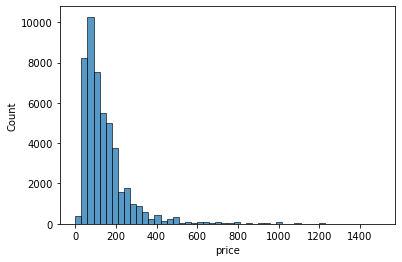

In [25]:
sns.histplot((df.price[df.price <1500]),bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

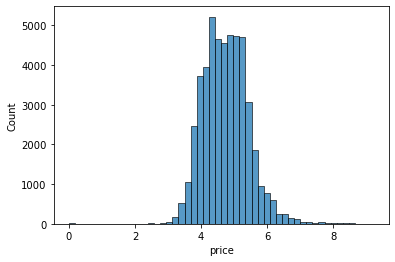

In [29]:
price_logs = np.log1p(df.price)

sns.histplot((price_logs), bins=50)

## Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [31]:
df.minimum_nights.median()

3.0

In [33]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

n_train, n_val, n_test

(29337, 9779, 9779)

In [262]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle (idx)

In [263]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [264]:
len(df_train)
df_train.head(15)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30
5966,40.70698,-73.95406,170,1,141,3.05,1,28
29838,40.71246,-73.96133,90,5,1,0.06,1,0
41764,40.76813,-73.84542,60,30,0,NaN,1,121
11118,40.72214,-73.99793,150,2,89,1.94,1,55
31800,40.81437,-73.82774,74,2,37,2.63,4,70


In [265]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [266]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [267]:
del df_train ['price']
del df_val ['price']
del df_test ['price']

In [268]:
df_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Question 3


##### We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. 
For each, train a linear regression model without regularization using the code from the lesssons.

In [269]:
m =df_train['reviews_per_month'].mean()

In [270]:
Xtrain_nzeros = df_train.fillna(0).values
Xtrain_nmean = df_train.fillna(m).values

In [271]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [272]:
w0, w = train_linear_regression(Xtrain_nzeros, y_train)



In [273]:
w0

-419.91265866086724

In [274]:
w

array([ 1.30676226e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
       -8.25470066e-03,  1.33371320e-03,  6.50203890e-04])

<AxesSubplot:ylabel='Count'>

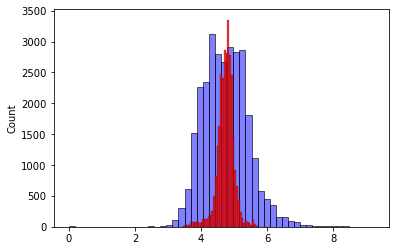

In [275]:

sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred_zeros, color='red', alpha=0.8, bins=50)

### Using the mean (instead of zeros to fill null)

In [276]:
w_0, w_m = train_linear_regression(Xtrain_nmean, y_train)



In [277]:
w_0

-423.5393082023219

In [278]:
w_m

array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849280e-04,
        5.34563274e-03,  1.32706019e-03,  6.38794182e-04])

<AxesSubplot:ylabel='Count'>

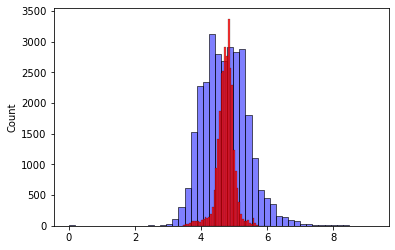

In [279]:
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred_mean, color='red', alpha=0.8, bins=50)


### Comparing rmse

In [280]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


x_val = df_val.fillna(0).values



y_pred_vmean = w_0 + x_val.dot(w_m)
y_pred_vzeros = w0 + x_val.dot(w)



In [281]:
means = round(rmse(y_val, y_pred_vmean),2)

In [282]:
zeros = round(rmse(y_val, y_pred_vzeros), 2)

In [283]:
means - zeros 

0.0

# Question 4

In [284]:
0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10

(0, 1e-06, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10)

In [285]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]



In [287]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    Xtrain_nzeros
    w0, w = train_linear_regression_reg(Xtrain_nzeros, y_train, r=r)
    
    x_val
    y_pred_vzeros = w0 + x_val.dot(w)
    score = rmse (y_val, y_pred_vzeros )
    
    print(r, w0, (round(score,2)))
    
  

0 -419.91265866086724 0.64
1e-06 -419.86271584310543 0.64
0.0001 -414.9764926433289 0.64
0.001 -375.27365274892543 0.64
0.01 -191.7838405478213 0.66
0.1 -32.562560550033176 0.68
1 -3.499216833574792 0.68
5 -0.7033623186161135 0.68
10 -0.35127676047352 0.68


# Question 5

In [288]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n=len(df)
    n_val_s = int(n*0.2)
    n_test_s = int(n*0.2)
    n_train_s = n-n_val-n_test

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle (idx)
    
    df_train_s = df.iloc[idx[:n_train_s]]
    df_val_s = df.iloc[idx[n_train_s:n_train_s+n_val_s]]
    df_tests_s = df.iloc[idx[n_train_s+n_val_s:]]
    
    y_train_s = np.log1p(df_train_s.price.values)
    y_val_s = np.log1p(df_val_s.price.values)
    y_test_s = np.log1p(df_tests_s.price.values)
    
    
    x_train_s = df_train.fillna(0).values
    
    x_val_s = df_val_s.fillna(0).values

  
    w0, w = train_linear_regression(x_train_s, y_train_s)
    
   
    print(s, w0, w)




0 -8.418717917043203 [ 5.50529251e-02 -1.47557026e-01  2.40143038e-04 -1.57296582e-04
 -7.05760719e-04 -7.62529108e-05  2.45893300e-05]
1 4.864013456752094 [ 5.08342501e-02  2.97735801e-02 -2.04908389e-04 -2.47184525e-04
  4.46858062e-03  6.02755142e-05  4.45670358e-05]
2 5.7940899610458025 [-7.49179693e-03  1.01692997e-02  2.17576379e-04 -2.26972041e-05
 -4.93066320e-05  8.23445103e-05  2.00904254e-05]
3 0.32436487250484447 [-9.46529286e-02 -1.11904594e-01 -3.25605226e-04  1.28855757e-04
 -4.27916780e-03 -1.32727427e-04  7.68974180e-06]
4 -5.225999933741495 [-3.50972749e-02 -1.54002429e-01  2.07322671e-05  2.65175370e-05
 -2.30248837e-03 -1.90060774e-04  1.85215509e-06]
5 -2.521787777659963 [-9.80483257e-02 -1.52291548e-01 -1.84375695e-04 -1.12548249e-04
  2.93652439e-03  1.49649083e-04 -3.85687780e-05]
6 10.97156741397611 [1.40117367e-01 1.61456074e-01 2.77295786e-04 1.96065067e-05
 1.87182087e-03 2.69867730e-05 3.86564394e-06]
7 11.083344073540626 [-1.56757531e-01 -4.50826261e-04  4

In [289]:
x_val_s[1]

array([ 40.60146, -73.94673,  40.     ,   2.     ,   0.     ,   0.     ,
         1.     ,  89.     ])

In [290]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n=len(df)
    n_val_s = int(n*0.2)
    n_test_s = int(n*0.2)
    n_train_s = n-n_val_s-n_test_s

    n_train, n_val, n_test

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle (idx)
    
    df_train_s = df.iloc[idx[:n_train_s]]
    df_val_s = df.iloc[idx[n_train_s:n_train_s+n_val_s]]
    df_tests_s = df.iloc[idx[n_train_s+n_val_s:]]
    
    
   
    y_train_s = np.log1p(df_train_s.price.values)
    y_val_s = np.log1p(df_val_s.price.values)
    y_test_s = np.log1p(df_tests_s.price.values)
    
    
    del df_train_s ['price']
    del df_val_s ['price']
    del df_tests_s ['price']
    
    x_train_s = df_train.fillna(0).values
    
    x_val_s = df_val_s.fillna(0).values

  
    w0, w = train_linear_regression(x_train_s, y_train_s)
    
    y_pred_vzeros_s = w0 + x_val_s.dot(w)
    score_s = [rmse (y_val_s, y_pred_vzeros )]
    
    x += [score_s]
    
    print(s, w0, score_s)
    


0 -8.418717917043203 [0.715259686062684]
1 4.864013456752094 [0.7080994369837903]
2 5.7940899610458025 [0.701880473767984]
3 0.32436487250484447 [0.6970812880398983]
4 -5.225999933741495 [0.7050352267267997]
5 -2.521787777659963 [0.6948909550032175]
6 10.97156741397611 [0.6891571297108119]
7 11.083344073540626 [0.7114812939283954]
8 12.208412932485665 [0.7112361759940868]
9 3.701611122493169 [0.7047679482521854]


In [291]:
x

[[0.7004522956578403],
 [0.7121069521567521],
 [0.7080535120780967],
 [0.7030829456285166],
 [0.6992412340231617],
 [0.7046160552381747],
 [0.6910797555868289],
 [0.6907321852608095],
 [0.7119259749745612],
 [0.7081798971272268],
 [0.7004522956578403],
 [0.715259686062684],
 [0.7080994369837903],
 [0.701880473767984],
 [0.6970812880398983],
 [0.7050352267267997],
 [0.6948909550032175],
 [0.6891571297108119],
 [0.7114812939283954],
 [0.7112361759940868],
 [0.7047679482521854]]

In [292]:
np.std(x)

0.007408794560098785

In [293]:
round(np.std(x),3)

0.007

# Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Train a model with r=0.001.
What's the RMSE on the test dataset?

In [294]:
n=len(df)
n_val_h = int(n*0.2)
n_test_h = int(n*0.2)
n_train_h = n-n_val_h-n_test_h

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle (idx)
    
df_train_h = df.iloc[idx[:n_train_h]]
df_val_h = df.iloc[idx[n_train_h:n_train_h+n_val_h]]
df_tests_h = df.iloc[idx[n_train_h+n_val_h:]]
    
    
y_train_h = np.log1p(df_train_h.price.values)
y_val_h = np.log1p(df_val_h.price.values)
y_test_h = np.log1p(df_tests_h.price.values)
    

y_full_train = np.concatenate([y_train_h, y_val_h])    
    
del df_train_h ['price']
del df_val_h ['price']
del df_tests_h ['price']



df_full_train = pd.concat([df_train_h, df_val_h])

x_full_train = df_full_train.fillna(0).values




w0, w = train_linear_regression_reg(x_full_train, y_full_train, r =0.001)
   
    
    
x_test = df_tests_h
    
y_full_train = w0 + x_test.dot(w)
s= rmse (y_test_h, y_full_train )
    

round(s, 2)
    

0.62